In [ ]:
import numpy as np 
import pandas as pd 
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras import applications
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import RMSprop, SGD
from keras.models import Model, Sequential
import matplotlib.pyplot as plt
from keras.layers import Input
from keras import models
from keras import layers
from keras import optimizers
from keras.preprocessing import image




Using TensorFlow backend.


In [ ]:
TrainPath="/content/drive/My Drive/data/train"
ValPath="/content/drive/My Drive/data/val"

In [ ]:
TrainGen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=10,  
    zoom_range = 0.1, 
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    vertical_flip=False,
    horizontal_flip=True)


ValGen = ImageDataGenerator(rescale=1. / 255)

train_generator = TrainGen.flow_from_directory(
    TrainPath,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical')

validation_generator = ValGen.flow_from_directory(
    ValPath,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical')

Found 93 images belonging to 5 classes.
Found 25 images belonging to 5 classes.


In [ ]:
input_tensor = Input(shape=(224, 224, 3))
vgg_conv = VGG16(weights='imagenet',
                               include_top=False,
                               input_tensor=input_tensor)
# Freeze the layers except the last 4 layers
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

# Create the model
model = models.Sequential()
 
# Add the vgg convolutional base model
model.add(vgg_conv)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(5000, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()



model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

                     

<keras.engine.input_layer.InputLayer object at 0x7fb57446c748> False
<keras.layers.convolutional.Conv2D object at 0x7fb57446c3c8> False
<keras.layers.convolutional.Conv2D object at 0x7fb574294940> False
<keras.layers.pooling.MaxPooling2D object at 0x7fb5742a3d68> False
<keras.layers.convolutional.Conv2D object at 0x7fb57423cc18> False
<keras.layers.convolutional.Conv2D object at 0x7fb574241470> False
<keras.layers.pooling.MaxPooling2D object at 0x7fb5742481d0> False
<keras.layers.convolutional.Conv2D object at 0x7fb57424c908> False
<keras.layers.convolutional.Conv2D object at 0x7fb574254a20> False
<keras.layers.convolutional.Conv2D object at 0x7fb57425c780> False
<keras.layers.pooling.MaxPooling2D object at 0x7fb574268208> False
<keras.layers.convolutional.Conv2D object at 0x7fb574270828> False
<keras.layers.convolutional.Conv2D object at 0x7fb5741f6940> False
<keras.layers.convolutional.Conv2D object at 0x7fb5741fb6a0> False
<keras.layers.pooling.MaxPooling2D object at 0x7fb574208080>

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=93// 16,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=25 // 16)

Epoch 1/50
5/5 [==============================] - 62s 12s/step - loss: 2.1941 - acc: 0.1376 - val_loss: 1.6075 - val_acc: 0.1250
Epoch 2/50
5/5 [==============================] - 63s 13s/step - loss: 1.7164 - acc: 0.2933 - val_loss: 1.2203 - val_acc: 0.5556
Epoch 3/50
5/5 [==============================] - 59s 12s/step - loss: 1.5244 - acc: 0.3026 - val_loss: 1.6126 - val_acc: 0.3125
Epoch 4/50
5/5 [==============================] - 54s 11s/step - loss: 1.3209 - acc: 0.4296 - val_loss: 1.2812 - val_acc: 0.4444
Epoch 5/50
5/5 [==============================] - 60s 12s/step - loss: 1.3323 - acc: 0.5122 - val_loss: 1.2218 - val_acc: 0.4375
Epoch 6/50
5/5 [==============================] - 55s 11s/step - loss: 0.9997 - acc: 0.6698 - val_loss: 1.2640 - val_acc: 0.5556
Epoch 7/50
5/5 [==============================] - 65s 13s/step - loss: 1.0746 - acc: 0.6000 - val_loss: 0.9940 - val_acc: 0.5625
Epoch 8/50
5/5 [==============================] - 54s 11s/step - loss: 0.7149 - acc: 0.8212 - val

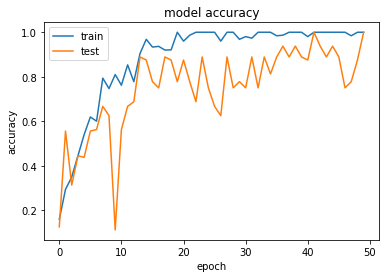

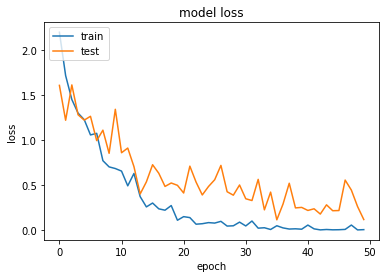

In [ ]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save_weights('MUST_TASK.h5')

[3.4617194e-06 7.2566472e-04 2.8328307e-06 9.9926466e-01 3.3559306e-06]
[3]


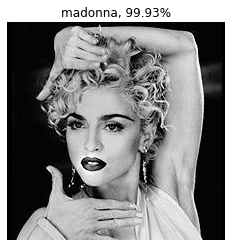

In [ ]:
import cv2
labels = ['ben_afflek',  'elton_john',  'jerry_seinfeld',  'madonna',  'mindy_kaling']
img = image.load_img('/content/httpcdnfuncheapcomwpcontentuploadsVOGUEjpg.jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x /= 255.
prediction = model.predict(x)[0]
print(prediction)

m=max(prediction)
res=[s for s, h in enumerate(prediction) if h == m]
print(res)

img = cv2.imread('/content/httpcdnfuncheapcomwpcontentuploadsVOGUEjpg.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.title("{}, {:.2f}%".format(labels[res[0]], prediction[res[0]]*100))
plt.imshow(img)